In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import io
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.preprocessing import LabelEncoder, StandardScaler

#Normalizar datos
from sklearn.preprocessing import MinMaxScaler

# PARA REVISAR DISTRIBUCIÓN DE LA NORMALIDAD
from scipy.stats import normaltest

# PARA REVISAR LA CORRELACIÓN DE LOS DATOS
import seaborn as sb

from sklearn.svm import SVC
import plotly.express as px

#Métricas
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, confusion_matrix,precision_score, recall_score, f1_score
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Importación knn
from sklearn.neighbors import KNeighborsClassifier


In [3]:
data_url= "/content/drive/MyDrive/1 Clases Universidad /2023-2/Inteligentes2/Parcial 1/ObesityDataSet_raw_and_data_sinthetic.csv"
dataset= pd.read_csv (data_url)
df = pd.DataFrame(dataset)

In [4]:
#visualizar algunas filas del dataframe
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


# **Limpieza de datos atipicos y sucios**

In [5]:
# comprobamos que no existan valores nulos dentro del dataset

# Verifica si hay valores nulos en cada columna
valores_nulos = df.isnull().any()

# Muestra las columnas con valores nulos (si los hubiera)
columnas_con_nulos = valores_nulos[valores_nulos == True]

# Si todas las columnas están libres de valores nulos, columnas_con_nulos estará vacío.

if columnas_con_nulos.empty:
    print("No hay valores nulos en ninguna columna.")
else:
    print("Columnas con valores nulos:")
    print(columnas_con_nulos)

No hay valores nulos en ninguna columna.


Cuartiles

Verificar distribuciones de probabilidad de las columnas numéricas

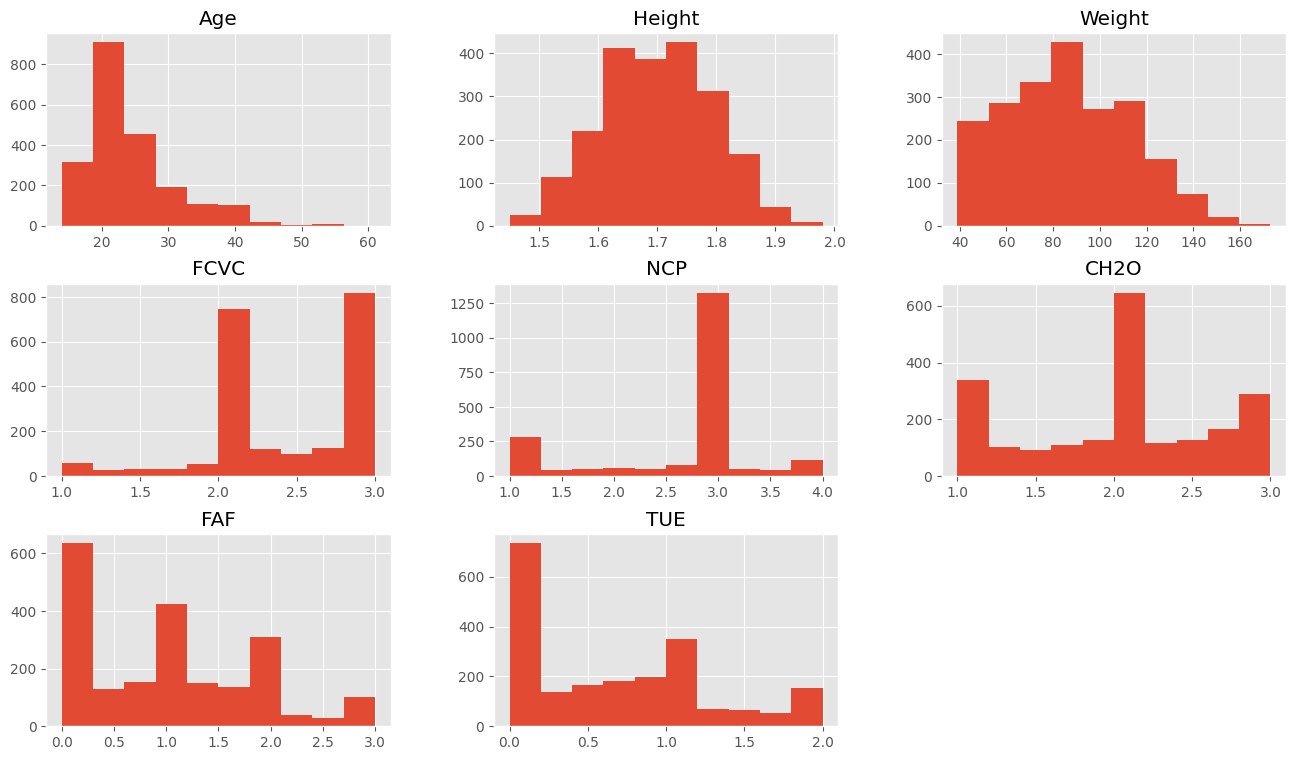

In [9]:
numerico = df.select_dtypes(np.number)
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
numerico.hist()
plt.show()

In [10]:
# Definir los cuartiles (25%, 50%, 75%)
quartiles = df.quantile([0.25, 0.5, 0.75])

# Definir el rango intercuartílico (IQR)
iqr = quartiles.loc[0.75] - quartiles.loc[0.25]

# Calcular los límites inferior y superior para cada columna
iqr_lim_inf = quartiles.loc[0.25] - 1.5 * iqr
iqr_lim_sup = quartiles.loc[0.75] + 1.5 * iqr

# Aplicar el recorte iterativamente a cada columna
for column in numerico.columns:
        numerico[column + '_Capped'] = numerico[column].clip(lower=iqr_lim_inf[column], upper=iqr_lim_sup[column])

<ipython-input-10-a1743ba8f25a>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quartiles = df.quantile([0.25, 0.5, 0.75])


Creación de BOX PLOT

In [13]:
for i, column in enumerate(numerico.columns):
  fig = px.box(numerico, y=numerico[column], width = 600, height=400)
  fig.show()

Se usará la prueba de Agostino para comprobar la distribución normal

In [ ]:
# se usará la prueba de Agostino
normal=[]
noNormal=[]
for oe in numerico:
  datosColumna = numerico[oe]
  stat,p=normaltest(datosColumna)
  if p > 0.5:
    normal.append(oe)
  else:
    noNormal.append(oe)

print("Con distribucion normal: ",normal)
print("Sin distribucion normal: ",noNormal)

Con distribucion normal:  []
Sin distribucion normal:  ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


Correlación de columnas numéricas

<Axes: title={'center': 'Obesity'}>

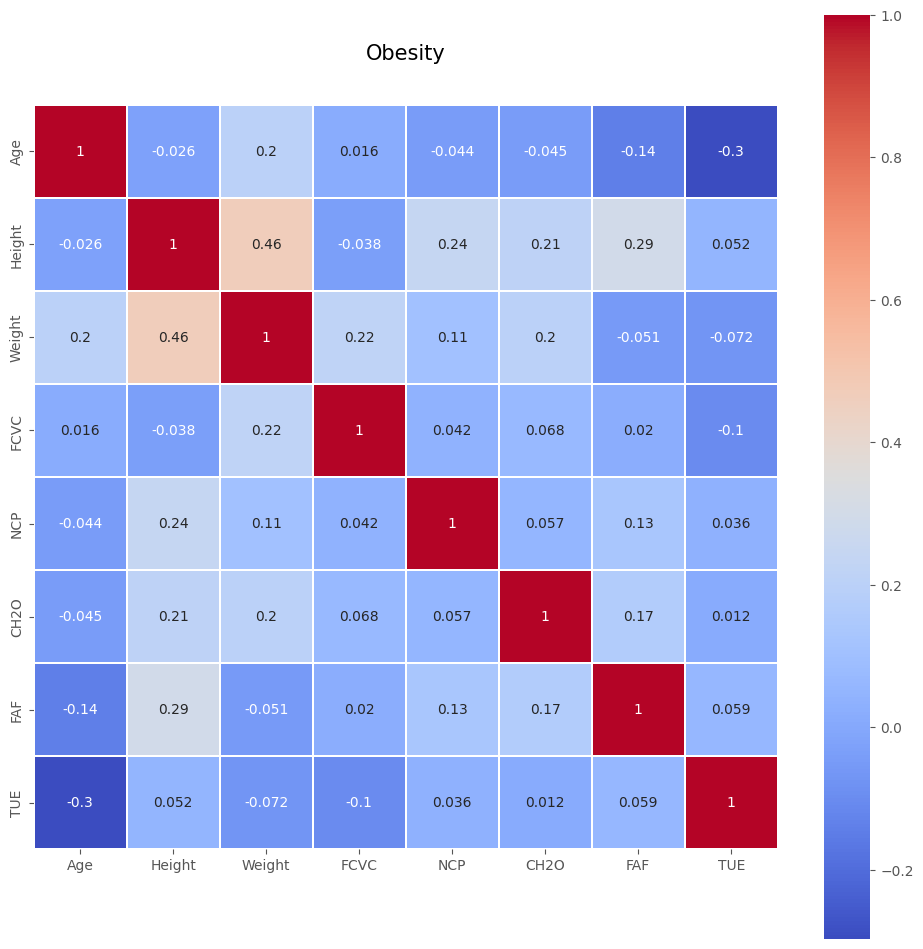

In [ ]:
colormap = plt.cm.coolwarm
plt.figure(figsize=(12,12))
plt.title('Obesity', y=1.05, size=15)
sb.heatmap(numerico.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Histogramas de datos categoricos

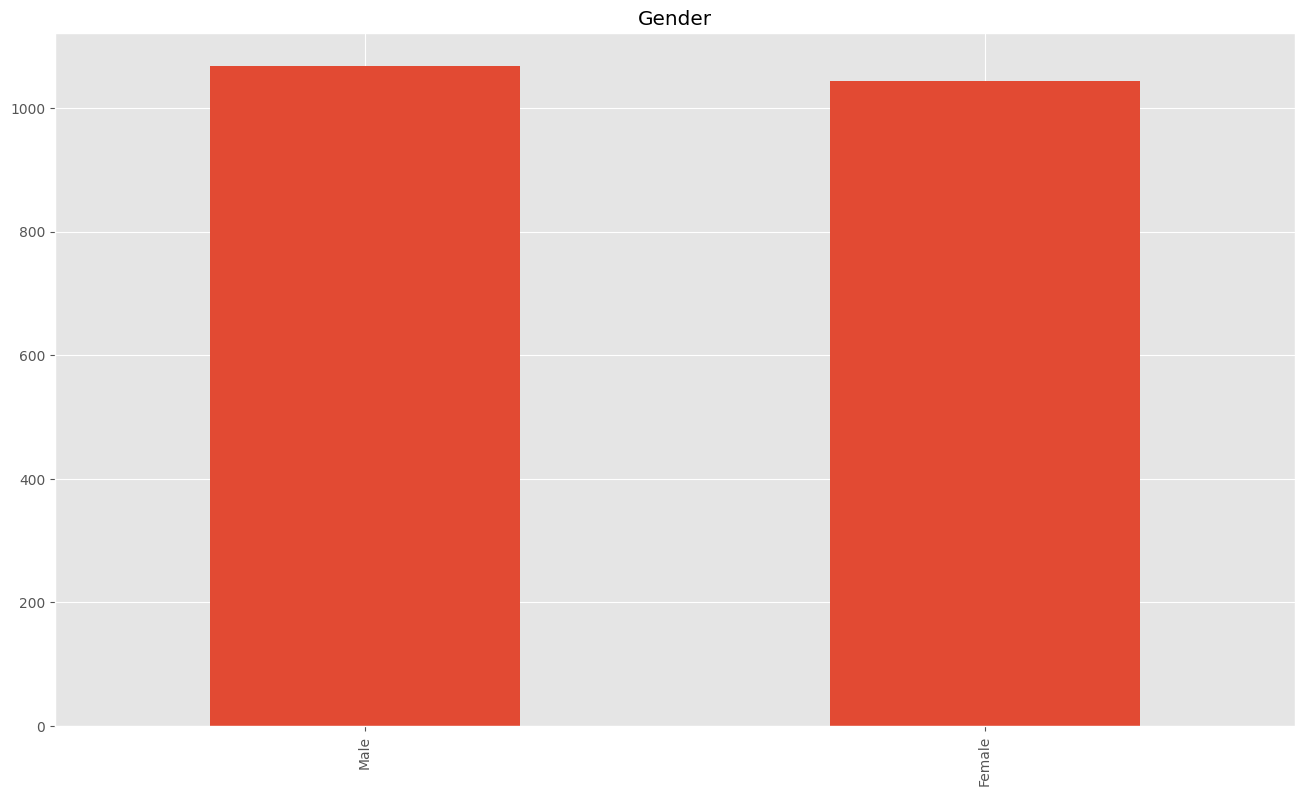

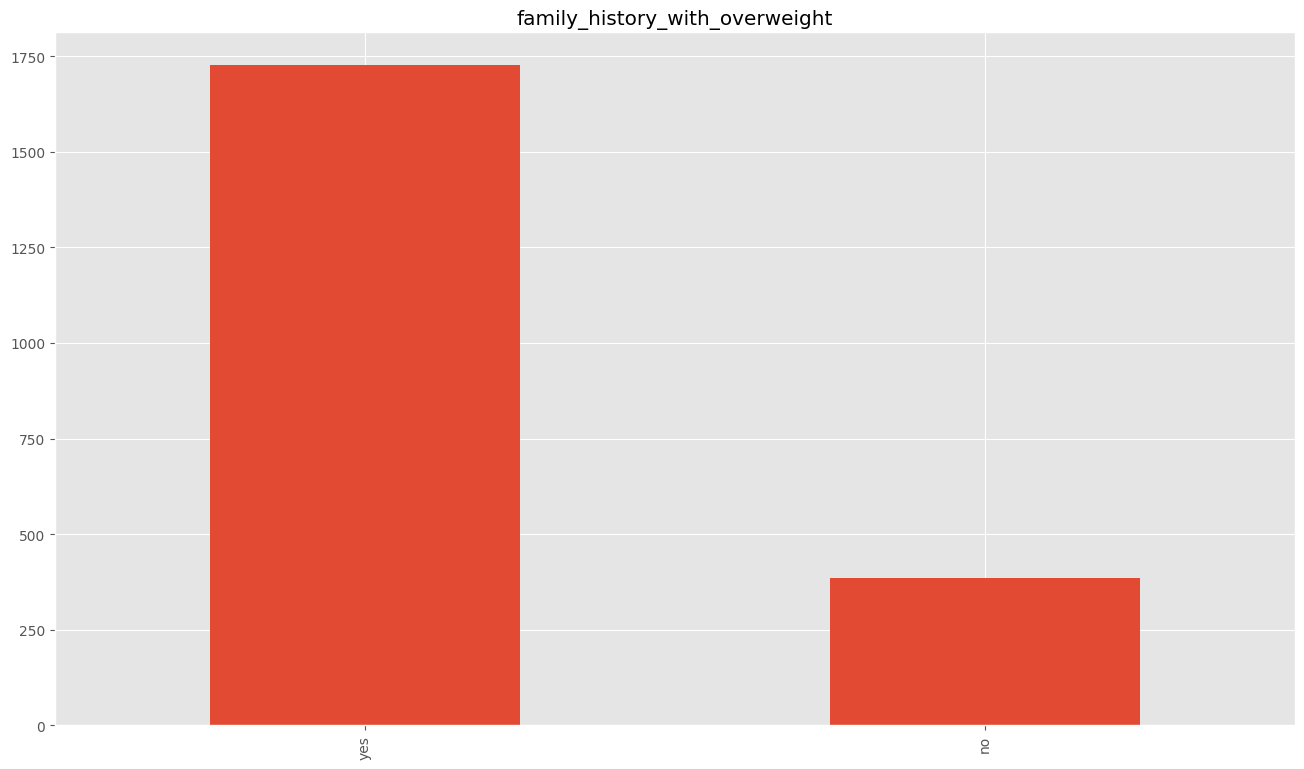

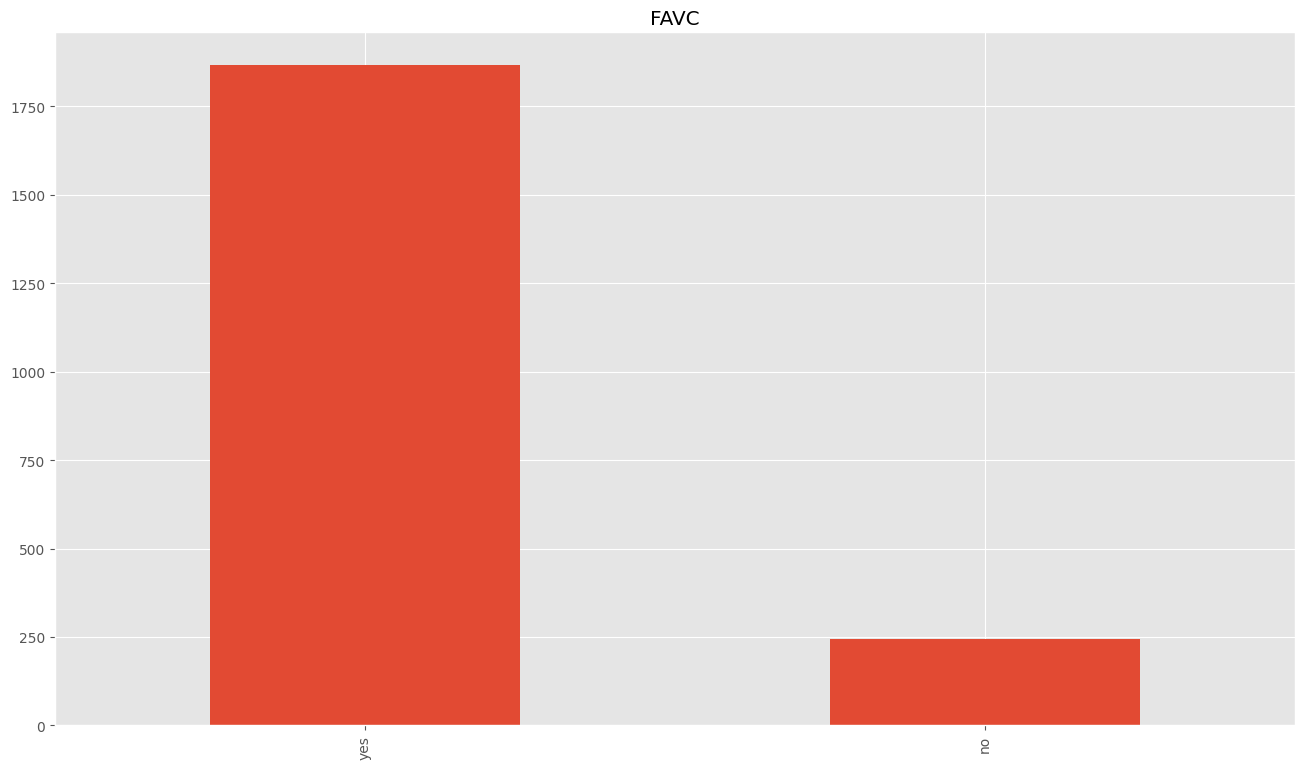

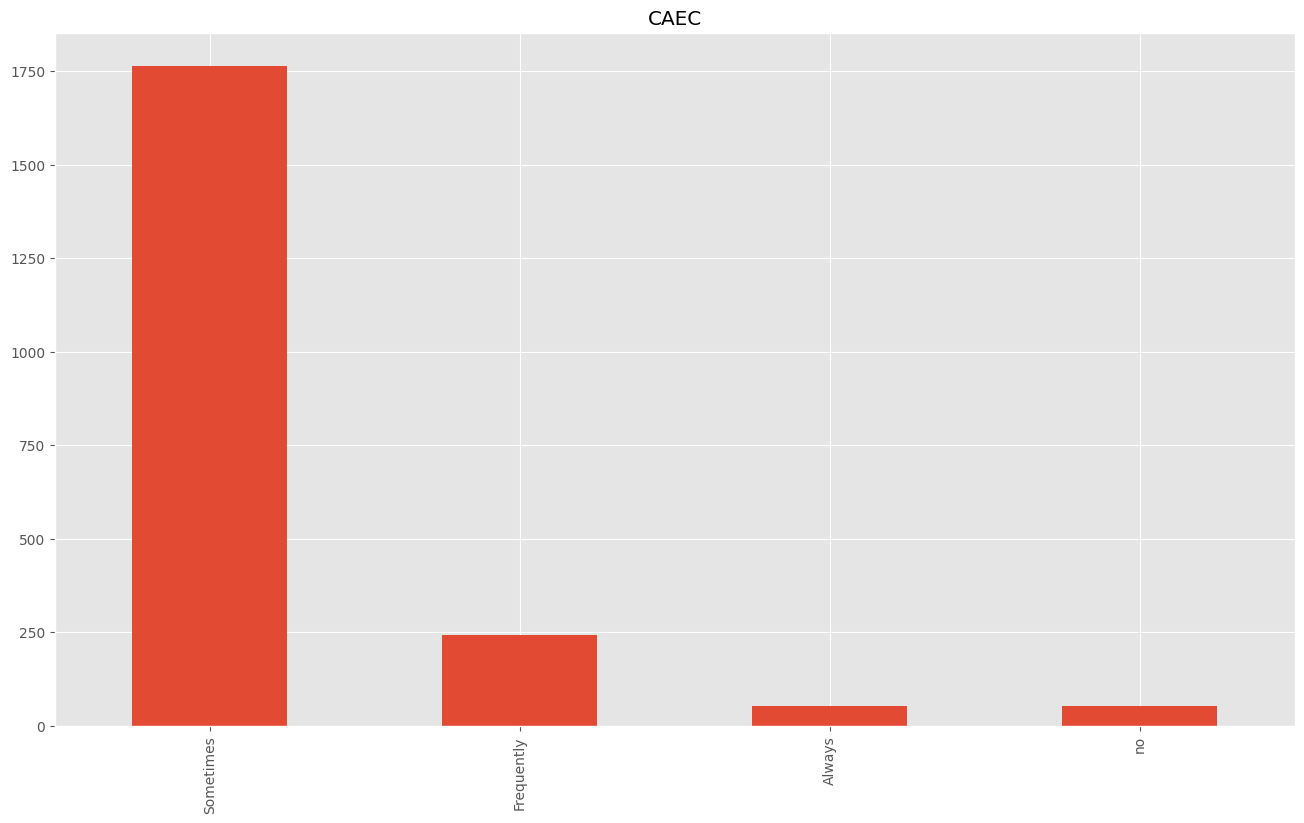

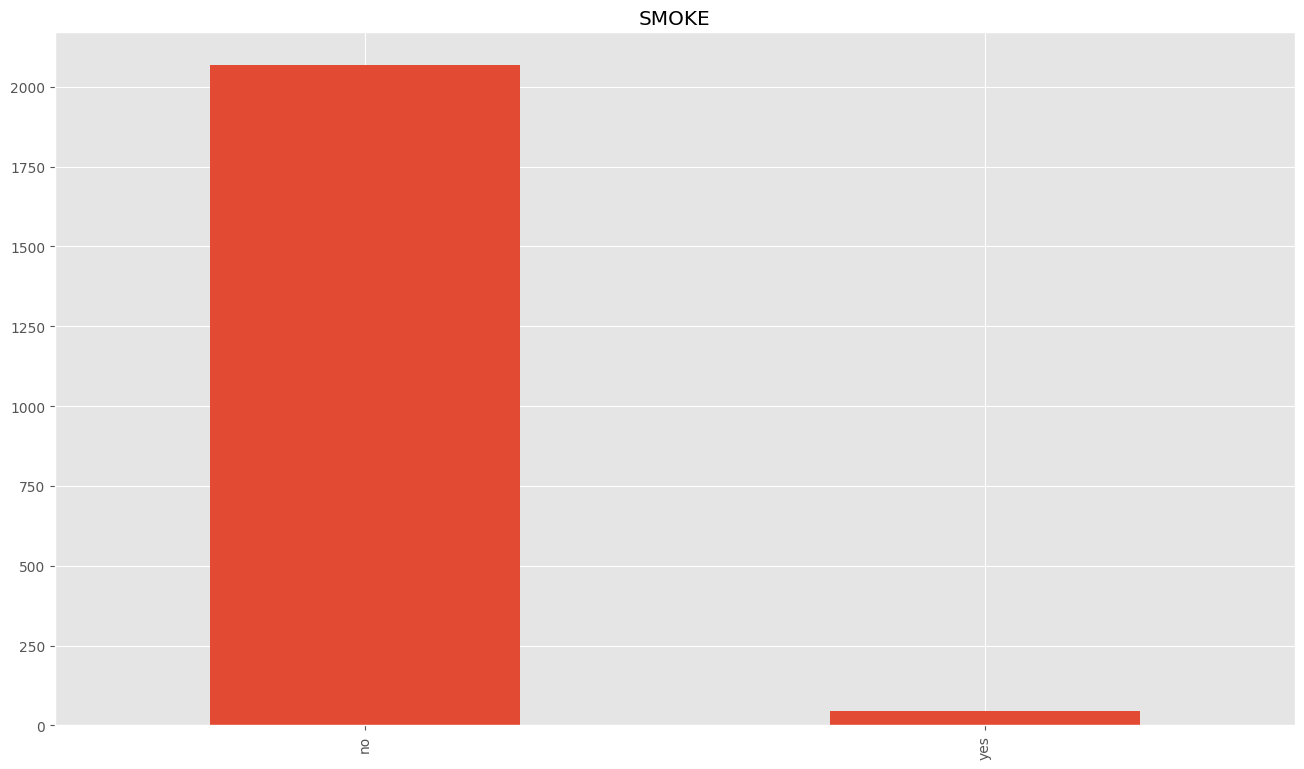

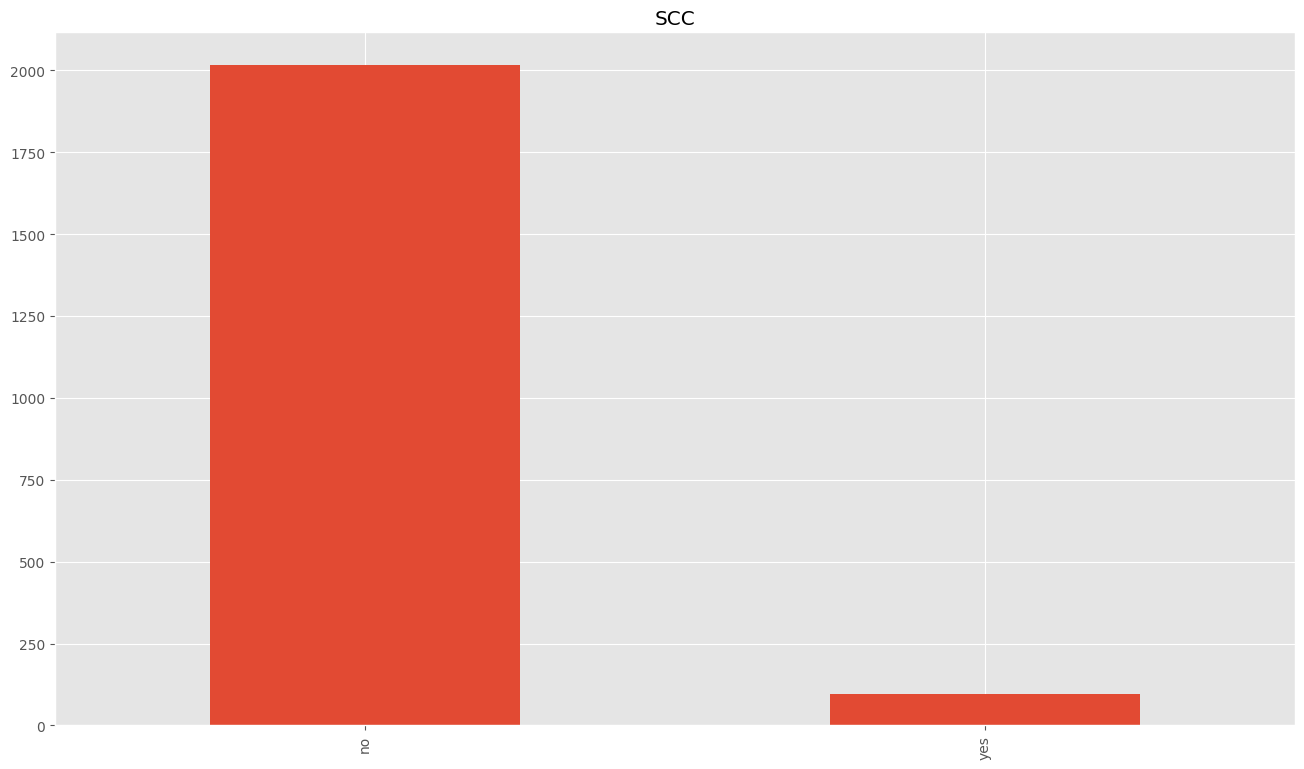

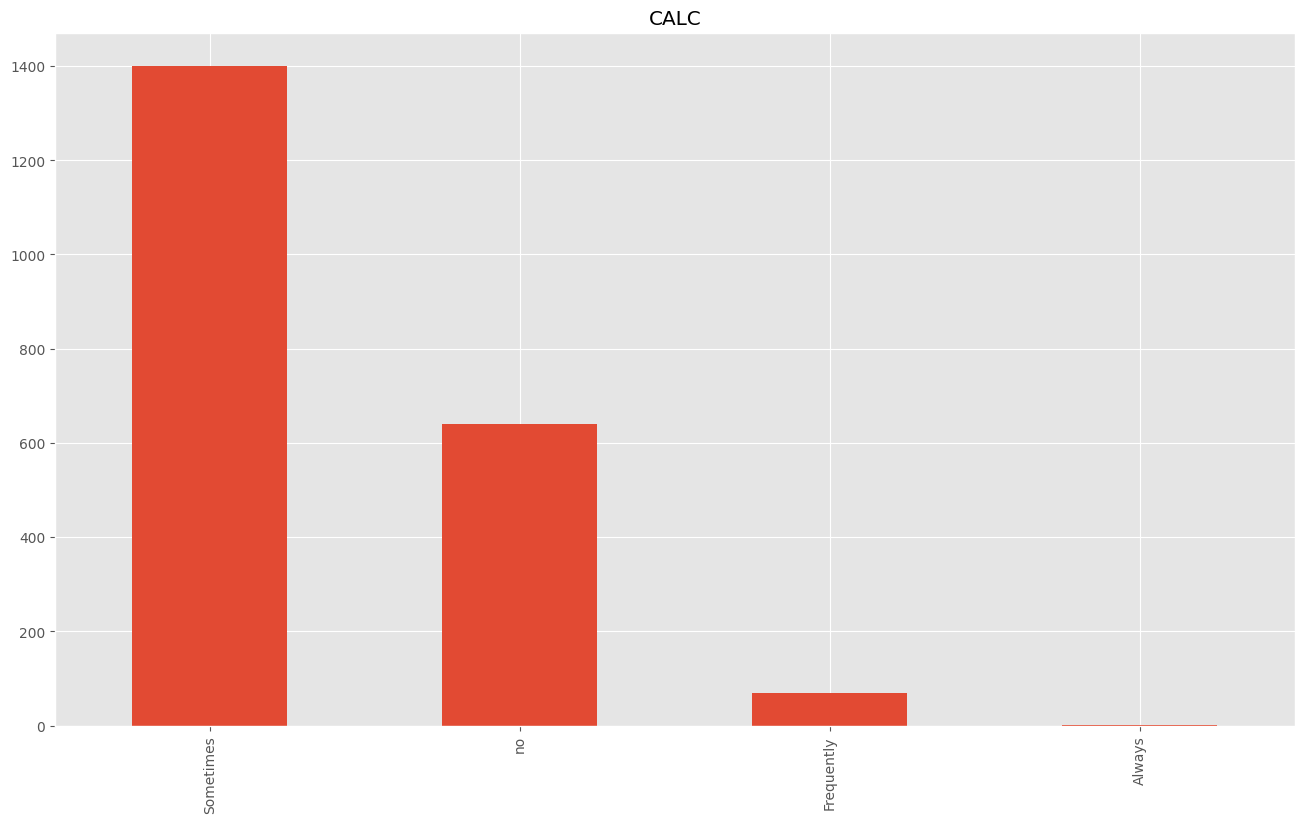

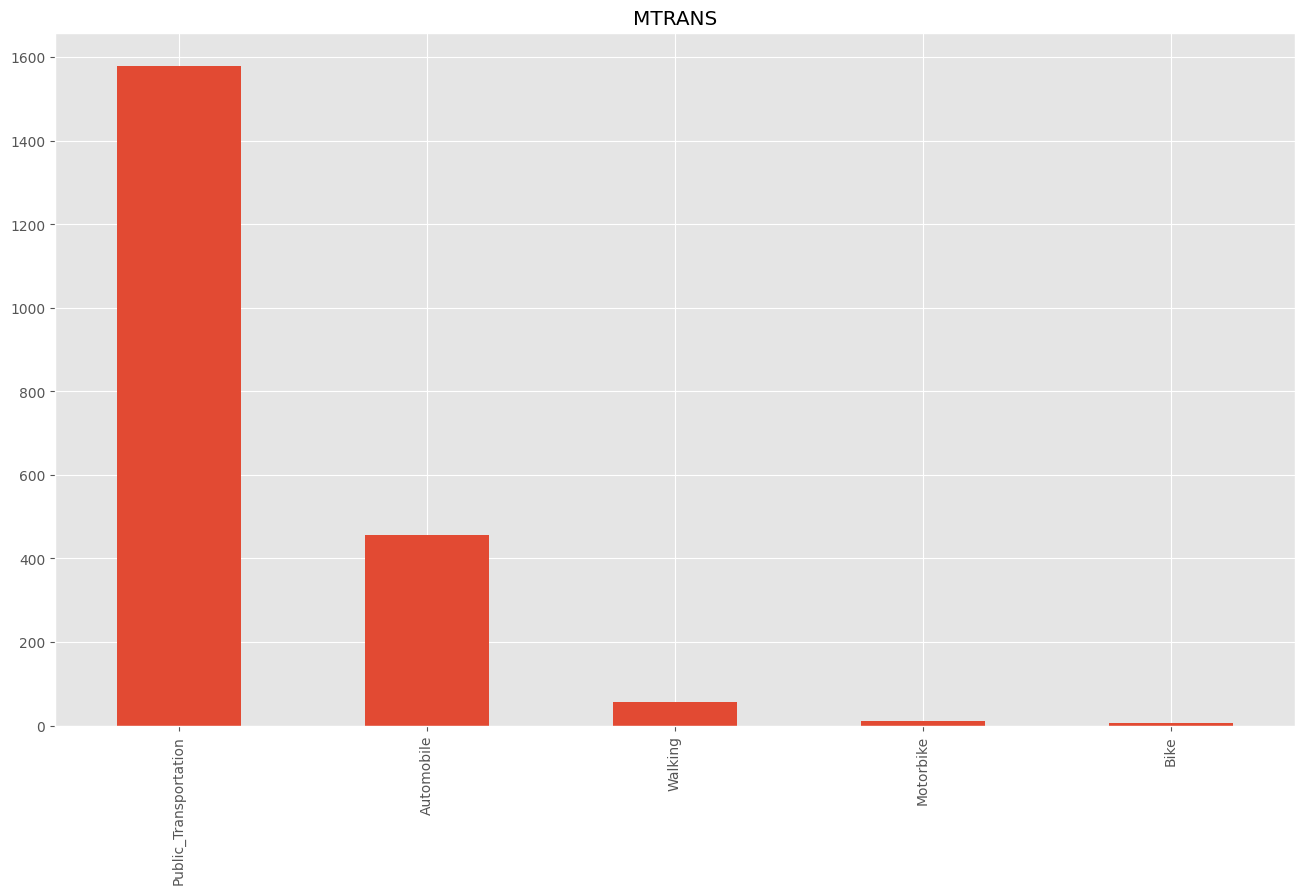

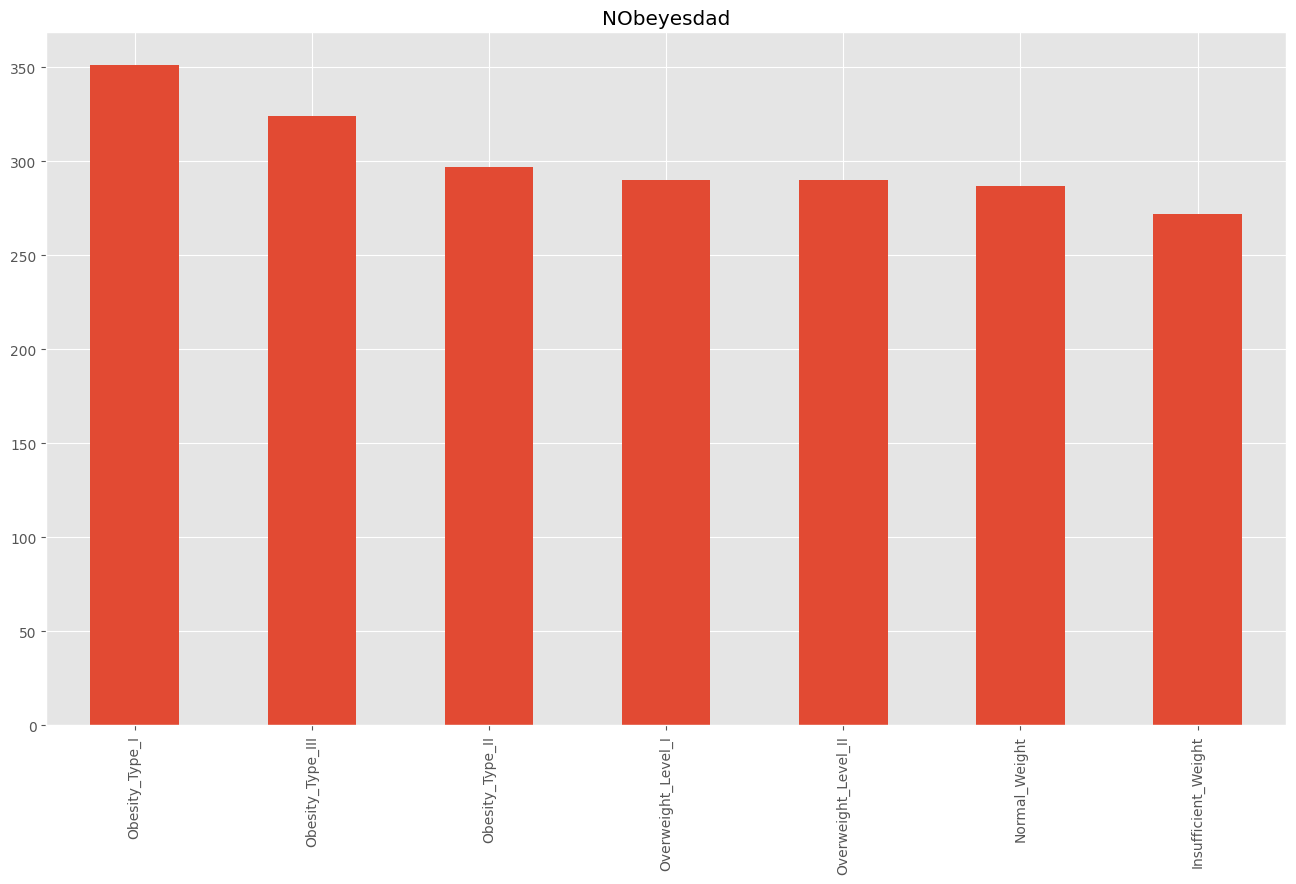

In [ ]:
categoricos = [col for col in df.columns if df[col].dtype == 'object' and col!= 'y'] # obteniendo los datos categoricos

# Mostrar los gráficos de barras para cada columna categórica
for col in categoricos:
      fig, ax = plt.subplots()
      df[col].value_counts().plot(kind='bar')
      ax.set_title(col)
      plt.show()

Codificar los valores categoricos para que queden en números, esto con el fin de tratar mejor los datos en el algoritmo

In [ ]:
encoder=LabelEncoder()
cat_colsAll = [col for col in df.columns if df[col].dtype == 'object']
# encodificar
for col in cat_colsAll:
        df[col] = encoder.fit_transform(df[col])

Separamos los datos por dos tipos, categórico y numérico

In [ ]:
dataNumerica = df.select_dtypes(np.number)
dataCategorica = df.select_dtypes(object)

Normalizar

In [ ]:
escalador=StandardScaler()
dataNumerica2=pd.DataFrame(escalador.fit_transform(dataNumerica), columns = dataNumerica.columns)
dataNumerica2.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,-1.011914,-0.522124,-0.875589,-0.862558,0.472291,-2.759769,-0.785019,0.404153,0.300346,-0.145900,-0.013073,-0.218272,-1.188039,0.561997,1.419172,0.503337,-1.032796
1,-1.011914,-0.522124,-1.947599,-1.168077,0.472291,-2.759769,1.088342,0.404153,0.300346,6.853997,1.618759,4.581439,2.339750,-1.080625,-0.521160,0.503337,-1.032796
2,0.988227,-0.206889,1.054029,-0.366090,0.472291,-2.759769,-0.785019,0.404153,0.300346,-0.145900,-0.013073,-0.218272,1.163820,0.561997,-2.461491,0.503337,-1.032796
3,0.988227,0.423582,1.054029,0.015808,-2.117337,-2.759769,1.088342,0.404153,0.300346,-0.145900,-0.013073,-0.218272,1.163820,-1.080625,-2.461491,1.296280,1.016776
4,0.988227,-0.364507,0.839627,0.122740,-2.117337,-2.759769,-0.785019,-2.167023,0.300346,-0.145900,-0.013073,-0.218272,-1.188039,-1.080625,-0.521160,0.503337,1.529168


Modificar datos numéricos

In [ ]:
dataNumerica3 = dataNumerica2.round()
dataNumerica3.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,-1.0,-1.0,-1.0,-1.0,0.0,-3.0,-1.0,0.0,0.0,-0.0,-0.0,-0.0,-1.0,1.0,1.0,1.0,-1.0
1,-1.0,-1.0,-2.0,-1.0,0.0,-3.0,1.0,0.0,0.0,7.0,2.0,5.0,2.0,-1.0,-1.0,1.0,-1.0
2,1.0,-0.0,1.0,-0.0,0.0,-3.0,-1.0,0.0,0.0,-0.0,-0.0,-0.0,1.0,1.0,-2.0,1.0,-1.0
3,1.0,0.0,1.0,0.0,-2.0,-3.0,1.0,0.0,0.0,-0.0,-0.0,-0.0,1.0,-1.0,-2.0,1.0,1.0
4,1.0,-0.0,1.0,0.0,-2.0,-3.0,-1.0,-2.0,0.0,-0.0,-0.0,-0.0,-1.0,-1.0,-1.0,1.0,2.0


In [ ]:
dataNumerica4 = dataNumerica3.astype(int)
dataNumerica2.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,-1.011914,-0.522124,-0.875589,-0.862558,0.472291,-2.759769,-0.785019,0.404153,0.300346,-0.145900,-0.013073,-0.218272,-1.188039,0.561997,1.419172,0.503337,-1.032796
1,-1.011914,-0.522124,-1.947599,-1.168077,0.472291,-2.759769,1.088342,0.404153,0.300346,6.853997,1.618759,4.581439,2.339750,-1.080625,-0.521160,0.503337,-1.032796
2,0.988227,-0.206889,1.054029,-0.366090,0.472291,-2.759769,-0.785019,0.404153,0.300346,-0.145900,-0.013073,-0.218272,1.163820,0.561997,-2.461491,0.503337,-1.032796
3,0.988227,0.423582,1.054029,0.015808,-2.117337,-2.759769,1.088342,0.404153,0.300346,-0.145900,-0.013073,-0.218272,1.163820,-1.080625,-2.461491,1.296280,1.016776
4,0.988227,-0.364507,0.839627,0.122740,-2.117337,-2.759769,-0.785019,-2.167023,0.300346,-0.145900,-0.013073,-0.218272,-1.188039,-1.080625,-0.521160,0.503337,1.529168


Unir los datos numéricos con los categóricos

In [ ]:
df = pd.concat([dataNumerica4,dataCategorica], axis = 1) #unir los datos numéricos
df.head(15)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,-1,-1,-1,-1,0,-3,-1,0,0,0,0,0,-1,1,1,1,-1
1,-1,-1,-2,-1,0,-3,1,0,0,7,2,5,2,-1,-1,1,-1
2,1,0,1,0,0,-3,-1,0,0,0,0,0,1,1,-2,1,-1
3,1,0,1,0,-2,-3,1,0,0,0,0,0,1,-1,-2,1,1
4,1,0,1,0,-2,-3,-1,-2,0,0,0,0,-1,-1,-1,1,2
5,1,1,-1,-1,-2,0,-1,0,0,0,0,0,-1,-1,-1,-2,-1
6,-1,0,-2,-1,0,0,1,0,0,0,0,0,0,-1,-1,0,-1
7,1,0,-1,-1,-2,-3,-1,0,0,0,0,0,2,-1,-1,1,-1
8,1,0,1,-1,0,0,1,0,0,0,0,0,0,1,-2,1,-1
9,1,0,0,-1,0,0,-1,0,0,0,0,0,0,1,1,1,-1


Datos normalizados y modificicados

In [ ]:
df.head(15)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,-1,-1,-1,-1,0,-3,-1,0,0,0,0,0,-1,1,1,1,-1
1,-1,-1,-2,-1,0,-3,1,0,0,7,2,5,2,-1,-1,1,-1
2,1,0,1,0,0,-3,-1,0,0,0,0,0,1,1,-2,1,-1
3,1,0,1,0,-2,-3,1,0,0,0,0,0,1,-1,-2,1,1
4,1,0,1,0,-2,-3,-1,-2,0,0,0,0,-1,-1,-1,1,2
5,1,1,-1,-1,-2,0,-1,0,0,0,0,0,-1,-1,-1,-2,-1
6,-1,0,-2,-1,0,0,1,0,0,0,0,0,0,-1,-1,0,-1
7,1,0,-1,-1,-2,-3,-1,0,0,0,0,0,2,-1,-1,1,-1
8,1,0,1,-1,0,0,1,0,0,0,0,0,0,1,-2,1,-1
9,1,0,0,-1,0,0,-1,0,0,0,0,0,0,1,1,1,-1


Asignación de variables para X y Y

In [ ]:
X=df.drop(["NObeyesdad"],axis=1) # obtener valores de x
y=df["NObeyesdad"] # valores de y
print(X.shape)
print(X)
print("----")
print(y.shape)
print(y)

(2111, 16)
      Gender  Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0         -1   -1      -1      -1                               0    -3    -1   
1         -1   -1      -2      -1                               0    -3     1   
2          1    0       1       0                               0    -3    -1   
3          1    0       1       0                              -2    -3     1   
4          1    0       1       0                              -2    -3    -1   
...      ...  ...     ...     ...                             ...   ...   ...   
2106      -1   -1       0       2                               0     0     1   
2107      -1    0       1       2                               0     0     1   
2108      -1    0       1       2                               0     0     1   
2109      -1    0       0       2                               0     0     1   
2110      -1    0       0       2                               0     0     1   

      NCP  CAEC 

Selección de caracteristicas

#IMPLEMENTACIÓN ALGORITMO MSV

PARTICIÓN DE DATOS 80% 20%

In [ ]:
XTrainMSV, XTestMSV, yTrainMSV, yTestMSV=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
# Definir los parámetros de la búsqueda de cuadrícula
grid = {'C': [0.1, 1, 10, 100]}

# Crear un clasificador SVM
svm = SVC()

# Realizar la búsqueda de cuadrícula para encontrar el mejor valor de C
gridSearch = GridSearchCV(svm, grid, cv=5)
gridSearch.fit(XTrainMSV, yTrainMSV)

# Imprimir el mejor valor de C y la precisión en datos de prueba
print("Mejor valor de C:", gridSearch.best_params_['C'])
print("Precisión en datos de prueba:", gridSearch.score(XTestMSV, yTestMSV))

Mejor valor de C: 100
Precisión en datos de prueba: 0.8250591016548463


In [ ]:
modeloMSV=SVC(kernel='rbf', C=10)
modeloMSV.fit(XTrainMSV,yTrainMSV)
yPredictMSV=modeloMSV.predict(XTestMSV) # Entrenamiento
print("Accuracy=",metrics.accuracy_score(yTestMSV,yPredictMSV))

Accuracy= 0.8557919621749409


In [ ]:
scores = cross_val_score(modeloMSV, X, y, cv=5) #rendimiento del modelo

# calcular la media y la desviación estándar de las puntuaciones de precisión
meanScore = np.mean(scores)
stdScore = np.std(scores)

# hacer predicciones en los datos de entrenamiento y prueba
yPredTrain = modeloMSV.predict(XTrainMSV)
yPredTest = modeloMSV.predict(XTestMSV)

# calcular la precisión en los datos de entrenamiento y prueba
accuracyTrain = accuracy_score(yTrainMSV, yPredTrain)
accuracyTest = accuracy_score(yTestMSV, yPredTest)


print("Precisión en los datos de entrenamiento:", accuracyTrain)
print("Precisión en los datos de prueba:", accuracyTest)

# imprimir las puntuaciones de precisión y sus estadísticas
print(f'Promedio de Puntuaciones de precisión: {scores.mean()}')
print(f'Precisión media: {meanScore}')
print(f'Desviación estándar de la precisión: {stdScore}')

Precisión en los datos de entrenamiento: 0.9733412322274881
Precisión en los datos de prueba: 0.8557919621749409
Promedio de Puntuaciones de precisión: 0.839035102461542
Precisión media: 0.839035102461542
Desviación estándar de la precisión: 0.115524603915181


Matriz de confusión

[[ 61   4   0   0   0]
 [ 11  96   3   8   6]
 [  0   0  53   0   0]
 [  0   9   0 112   5]
 [  0  11   0   4  40]]


<Axes: >

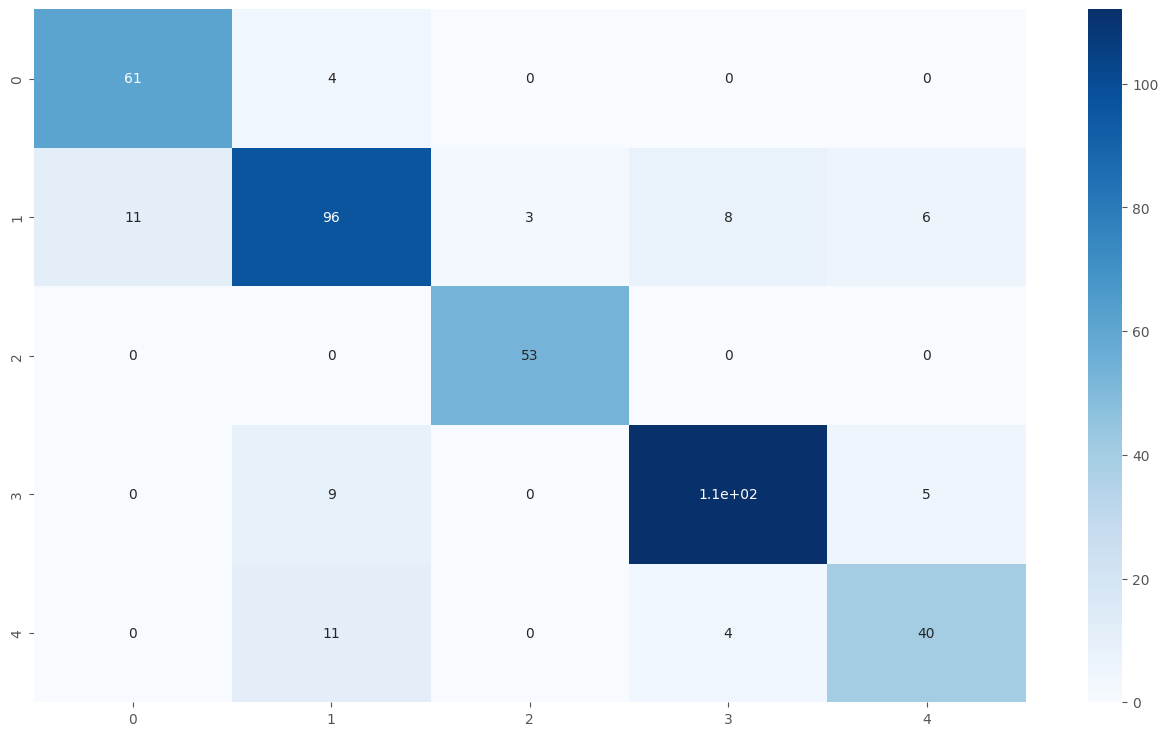

In [ ]:
matrizMSV=confusion_matrix(yTestMSV,yPredictMSV)
print(matrizMSV)
sb.heatmap(matrizMSV,annot=True,cmap="Blues")

Evaluación capacidad de clasificación correcta del modelo

In [ ]:
sensibilidad = vp / (vp + fn) # O  también conocida como recall
especificidad = vn / (vn + fp) # capacidad del modelo  para detectar correctamente los negativos
print('Sensibilidad:', sensibilidad)
print('Especificidad:', especificidad)

Sensibilidad: 0.8472222222222222
Especificidad: 0.96


Métricas

In [ ]:
precision_recall_fscore_support(yTestMSV,yPredictMSV,average=None)
etiquetas=["-2","-1", "0", "1", "2"]
print(classification_report(yTestMSV,yPredictMSV,target_names=etiquetas))
reportMSV = classification_report(yTestMSV,yPredictMSV,target_names=etiquetas)

              precision    recall  f1-score   support

          -2       0.85      0.94      0.89        65
          -1       0.80      0.77      0.79       124
           0       0.95      1.00      0.97        53
           1       0.90      0.89      0.90       126
           2       0.78      0.73      0.75        55

    accuracy                           0.86       423
   macro avg       0.86      0.87      0.86       423
weighted avg       0.85      0.86      0.85       423



In [ ]:
accuracy = accuracy_score(yTestMSV, yPredictMSV) # proporción de predicciones correctas del modelo
precision = precision_score(yTestMSV, yPredictMSV, average='weighted') # proporción de predicciones positivas que fueron correctas
recall = recall_score(yTestMSV, yPredictMSV, average='weighted') # proporción de positivos reales que se identificaron correctamente
f1 = f1_score(yTestMSV, yPredictMSV, average='weighted') # medida armónica de precision y recall
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8557919621749409
Precision: 0.8543117381679024
Recall: 0.8557919621749409
F1 Score: 0.8543822707720313
